In [22]:
# print_function for compatibility with Python 3
from __future__ import print_function

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)

from sklearn.decomposition import PCA

In [3]:
# Read item_data.csv
df=pd.read_csv('project_files/item_data.csv',index_col=0)

In [4]:
# Display item_data's shape
df.shape

(414, 2574)

In [44]:
# Initialize instance of StandardScaler

item_sc=StandardScaler()
# Fit and transform item_data
item_data_scaled=item_sc.fit_transform(df)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [46]:
# Initialize and fit a PCA transformation

pc=PCA()
pc.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
# Generate new features
PC_items = pc.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   6.81399381e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.67067488e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -1.98625838e-15],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,   3.72965547e-16],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   3.96904731e-15]])

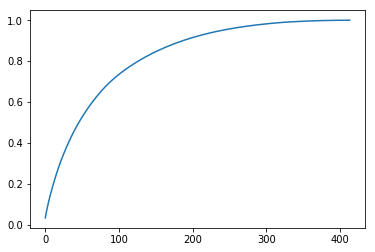

In [53]:
# Cumulative explained variance
cumulative_explained_variance=np.cumsum(pc.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)),cumulative_explained_variance)

In [54]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205403

In [58]:
# Initialize PCA transformation, only keeping 125 components
pca=PCA(n_components=125)

# Fit and transform item_data_scaled
pca.fit(item_data_scaled)
PC_items=pca.transform(item_data_scaled)
# Display shape of PC_items
PC_items.shape

(414L, 125L)

In [60]:
# Put PC_items into a dataframe
items_pca=pd.DataFrame(PC_items)

# Name the columns
items_pca.columns=['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index=df.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876140,4.828908,-0.495536,3.093868,-0.633718,-11.534005,2.162065,7.116964,5.336009,4.424434,...,-0.287183,0.180107,-0.067891,0.446641,0.612589,-0.068337,-0.368486,-0.614079,0.040555,-0.536834
12348,-4.219833,1.226228,-1.881750,-0.174376,0.818003,1.160651,-0.871376,-0.846491,0.459925,0.854550,...,-0.479025,-0.784684,1.242603,0.844374,-1.739989,0.756197,0.900938,-0.101712,-0.515705,3.867288
12349,-1.260833,2.387628,-0.073222,-1.119182,-0.034170,-3.714953,-0.344058,-0.149036,-0.789765,-0.380293,...,-1.520954,2.777021,-1.295895,0.577675,-0.224062,-1.365487,-0.654526,-1.202683,-0.664729,-4.142010
12350,-4.929318,-0.714870,-1.580911,-0.469732,-0.116302,0.647933,0.112884,-1.336266,1.547086,-1.190348,...,2.163672,-1.003627,0.425208,0.175096,-0.466048,-0.026856,-0.445150,0.385755,-1.065481,-0.435658
12352,-2.053140,2.110815,0.184691,0.128487,0.087895,-1.943619,2.383255,0.898724,-0.672111,0.080163,...,-5.719881,3.104791,3.839123,2.906790,-1.023003,-10.385841,-2.489582,-4.326571,3.195885,-1.705039


In [61]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')